In [57]:
import numpy as np 
import pyGPs as gp 
import sklearn.metrics as mt
import matplotlib.pyplot as plt
import scipy as sp
import os
os.chdir("/Users/RayneHernandez1/Desktop/NextFlu") 
import pandas as pd 
from scipy import signal
from scipy.stats import norm
from sklearn import mixture
import statsmodels.tsa.arima_model as ar
import pyflux as pf

In [2]:
data_17 =  pd.read_csv(filepath_or_buffer = "/Users/RayneHernandez1/Desktop/NextFlu/ILINet_16-17.csv", header = 1)
data_16 =  pd.read_csv(filepath_or_buffer = "/Users/RayneHernandez1/Desktop/NextFlu/FluView_LineChart_Data_15-16.csv", header = 1)
data_15 =  pd.read_csv(filepath_or_buffer = "/Users/RayneHernandez1/Desktop/NextFlu/FluView_LineChart_Data_14-15.csv", header = 1)
data_14 =  pd.read_csv(filepath_or_buffer = "/Users/RayneHernandez1/Desktop/NextFlu/FluView_LineChart_Data_13-14.csv", header = 1)
data_13 =  pd.read_csv(filepath_or_buffer = "/Users/RayneHernandez1/Desktop/NextFlu/FluView_LineChart_Data_12-13.csv", header = 1)
data_12 =  pd.read_csv(filepath_or_buffer = "/Users/RayneHernandez1/Desktop/NextFlu/FluView_LineChart_Data_11-12.csv", header = 1)
data_11 =  pd.read_csv(filepath_or_buffer = "/Users/RayneHernandez1/Desktop/NextFlu/FluView_LineChart_Data_10-11.csv", header = 1)
data_10 =  pd.read_csv(filepath_or_buffer = "/Users/RayneHernandez1/Desktop/NextFlu/FluView_LineChart_Data_9-10.csv", header = 1)
data_9 =  pd.read_csv(filepath_or_buffer = "/Users/RayneHernandez1/Desktop/NextFlu/FluView_LineChart_Data_8-9.csv", header = 1)
data_8 =  pd.read_csv(filepath_or_buffer = "/Users/RayneHernandez1/Desktop/NextFlu/FluView_LineChart_Data_7-8.csv", header = 1)

In [3]:
week_17 = data_17["WEEK"]
week_16 = data_16["WEEK"]
week_15 = data_15["WEEK"]
week_14 = data_14["WEEK"]
week_13 = data_13["WEEK"]
week_12 = data_12["WEEK"]
week_11 = data_11["WEEK"]
week_10 = data_10["WEEK"]
week_9 = data_9["WEEK"]
week_8 = data_8["WEEK"]

In [4]:
ILI_17 = data_17['% WEIGHTED ILI']
ILI_16 = data_16['% Weighted ILI ']
ILI_15 = data_15['% Weighted ILI ']
ILI_14 = data_14['% Weighted ILI ']
ILI_13 = data_13['% Weighted ILI ']
ILI_12 = data_12['% Weighted ILI ']
ILI_11 = data_11['% Weighted ILI ']
ILI_10 = data_10['% Weighted ILI ']
ILI_9 = data_9['% Weighted ILI ']
ILI_8 = data_8['% Weighted ILI ']
ILI = np.concatenate((ILI_8, ILI_9, ILI_10, ILI_11, ILI_12))

In [5]:
data_phyl = pd.read_csv(filepath_or_buffer = "/Users/RayneHernandez1/Desktop/NextFlu/USCanada_Effpop_1998-2012.csv", header = 0)


In [6]:
time_phyl = data_phyl["time"]
time_phyl = np.array(time_phyl)
effPop = data_phyl["effPop"]
effPop = np.array(effPop)

In [7]:
time_8 = np.concatenate((np.arange(start = 2007 + (1/52)*39, stop = 2007 + (1/52)*51, step = (1/52)), \
                         np.arange(start = 2008, stop = 2008 + (1/53)*38, step = (1/53))))
time_9 = np.concatenate((np.arange(start = 2008 + (1/53)*39, stop = 2008 + (1/53)*52, step = (1/53)), \
                         np.arange(start = 2009, stop = 2009 + (1/52)*33, step = (1/52))))
time_10 = np.concatenate((np.arange(start = 2009 + (1/52)*34, stop = 2009 + (1/52)*51, step = (1/52)), \
                          np.arange(start = 2010, stop = 2010 + (1/52)*38, step = (1/52))))
time_11 = np.concatenate((np.arange(start = 2010 + (1/52)*39, stop = 2010 + (1/52)*51, step = (1/52)), \
                          np.arange(start = 2011, stop = 2011 + (1/52)*38, step = (1/52))))
time_12 = np.concatenate((np.arange(start = 2011 + (1/52)*39, stop = 2011 + (1/52)*51, step = (1/52)), \
                          np.arange(start = 2012, stop = 2012 + (1/52)*38, step = (1/52))))
time_13 = np.concatenate((np.arange(start = 2012 + (1/52)*39, stop = 2012 + (1/52)*51, step = (1/52)), \
                          np.arange(start = 2013, stop = 2013 + (1/52)*38, step = (1/52))))
time_14 = np.concatenate((np.arange(start = 2013 + (1/52)*39, stop = 2013 + (1/52)*51, step = (1/52)), \
                          np.arange(start = 2014, stop = 2014 + (1/53)*38, step = (1/53))))
time_15 = np.concatenate((np.arange(start = 2014 + (1/53)*39, stop = 2014 + (1/53)*52, step = (1/53)), \
                          np.arange(start = 2015, stop = 2015 + (1/52)*38, step = (1/52))))
time_16 = np.concatenate((np.arange(start = 2015 + (1/52)*39, stop = 2015 + (1/52)*51, step = (1/52)), \
                          np.arange(start = 2016, stop = 2016 + (1/52)*38, step = (1/52))))
time = np.concatenate((time_8, time_9, time_10, time_11, time_12)) 

In [8]:
def SMReg(Q, D, x, y, x_test) :
    k = gp.Core.cov.SM(Q = Q, D = D)
    k.hyp = k.hyp.tolist()
    print(k.hyp)
    model = gp.Core.gp.GPR() 
    model.setPrior(kernel=k)
    model.setData(x, y) 
    model.getPosterior()
    model.setOptimizer("Minimize")
    model.optimize(x, y)
    ym, ys2, fm, fs2, lp = model.predict(x_test)
    #model.plot()
    print(k.hyp)
    print(model.nlZ)
    return model

def RBReg(x, y, x_test) : 
    k = gp.Core.cov.RBF()
    print(k.hyp)
    model = gp.Core.gp.GPR() 
    #model.setNoise( log_sigma = np.log(0.01) )
    model.setPrior(kernel=k)
    model.setData(x, y) 
    model.getPosterior()
    model.setOptimizer("Minimize")
    model.optimize(x, y)
    ym, ys2, fm, fs2, lp = model.predict(x_test)
    #model.plot()
    print(k.hyp)
    print(model.nlZ)
    return model

In [9]:
def dist_mat_1D(x1, x2) :
    dist = np.zeros((x1.size, x2.size))
    for i in range(0, x1.size) :
        for j in range(0, x2.size) :
            dist[i][j] = np.linalg.norm(x1[i] - x2[j])
    return dist
    
def initSM_1d(Q, x, y) :
    w = np.zeros((Q,))
    m = np.zeros((Q,))
    v = np.zeros((Q,))

    dist = dist_mat_1D(x, x) # get distance matrix

    #correct distance matrix so that it has no zero entries 
    for i in range(0, dist.shape[0]) :
        for j in range(0, dist.shape[1]) :
            if dist[i][j] == 0 :
                dist[i][j] = dist[0][1]

    minshift = np.amin(dist)
    nyquist = 0.5/minshift
    maxshift = np.amax(dist)

    for i in range(0, Q) :
        w[i] = (np.std(y)/Q)
        m[i] = np.random.uniform(0,nyquist)
        v[i] = 1/(np.absolute(maxshift*np.random.normal(0,1)))

    w = np.log(w)
    m = np.log(m)
    v = np.log(v)
    hyp = []
    hyp = hyp + (w.tolist())
    hyp = hyp + (m.tolist())
    hyp = hyp + (v.tolist())
    return hyp

def SMRegInit(Q, D, x, y, x_test) :
    k = gp.Core.cov.SM(Q = Q, D = D)
    k.hyp = initSM_1d(Q, x, y)
    model = gp.Core.gp.GPR() 
    model.setPrior(kernel=k)
    model.setData(x, y) 
    model.getPosterior()
    model.setOptimizer("Minimize")
    model.optimize(x, y)
    ym, ys2, fm, fs2, lp = model.predict(x_test)
    #model.plot()
    return model

In [10]:
#iterates GP regression 10 times and returns the model with the highest marginal likelihood 
def SMRegIter(Q, D, x, y, x_test) :
    k = gp.Core.cov.SM(Q = Q, D = D)
    k.hyp = k.hyp.tolist()
    model = gp.Core.gp.GPR() 
    model.setPrior(kernel=k)
    model.setData(x, y) 
    model.getPosterior()
    model.setOptimizer("Minimize")
    model.optimize(x, y)
    ym, ys2, fm, fs2, lp = model.predict(x_test)
    #model.plot()
    lik = model.nlZ
    ret_mod = model
    #for i in range(0, 5) :
        #k = gp.Core.cov.SM(Q = Q, D = D)
        #k.hyp = k.hyp.tolist()
        #model = gp.Core.gp.GPR() 
        #model.setPrior(kernel=k)
        #model.setData(x, y) 
        #model.getPosterior()
        #model.setOptimizer("Minimize")
        #model.optimize(x, y)
        #ym, ys2, fm, fs2, lp = model.predict(x_test)
        #if (model.nlZ < lik) :
        #    ret_mod = model
    return ret_mod

In [11]:
def SMRoll(x_train, y_train, x_test, y_test): 
    x_train_curr = x_train.reshape(x_train.size)
    x_train_curr = x_train_curr[0:-3]
    y_train_curr = y_train.reshape(y_train.size)
    y_train_curr = y_train_curr[0:-3]
    x_test_curr = x_test.reshape(x_test.size) 
    x_test_curr = np.concatenate((x_train_curr[-3:], x_test_curr))
    y_test_curr = y_test.reshape(y_test.size)
    y_test_curr = np.concatenate((y_train_curr[-3:], y_test_curr))
    model = SMRegIter(Q = 5, D = 1, x = x_train_curr, y = y_train_curr, x_test = x_test_curr[0:4])
    #plt.plot(x_test_curr, y_test_curr)
    #plt.scatter(x_test_curr[0:4], model.ym)
    #plt.show()
    results_gp = np.array(model.ym.reshape(1, model.ym.size))
    for i in range(1, y_test.size) :
        x_train_curr = np.append(x_train_curr, x_test_curr[0])
        x_train_curr = x_train_curr[-200:]
        x_test_curr = x_test_curr[1:]
        y_train_curr = np.append(y_train_curr, y_test_curr[0])
        y_train_curr = y_train_curr[-200:]
        y_test_curr = y_test_curr[1:]
        while True:
            try: 
                model = SMRegIter(Q = 5, D = 1, x = x_train_curr, y = y_train_curr, x_test = x_test_curr[0:4])
                break
            except: 
                pass
        #plt.plot(x_test_curr, y_test_curr)
        #plt.scatter(x_test_curr[0:4], model.ym)
        #plt.show()
        results_gp = np.vstack((results_gp, model.ym.reshape(1, model.ym.size))) 

    x_train_curr = np.append(x_train_curr, x_test_curr[0])
    x_train_curr = x_train_curr[-200:]
    x_test_curr = x_test_curr[1:]
    y_train_curr = np.append(y_train_curr, y_test_curr[0])
    y_train_curr = y_train_curr[-200:]
    y_test_curr = y_test_curr[1:]
    while True:
        try: 
            model = SMRegIter(Q = 5, D = 1, x = x_train_curr, y = y_train_curr, x_test = x_test_curr[0:3])
            break
        except: 
            pass
    results_gp = np.vstack((results_gp, np.append(model.ym.reshape(1, model.ym.size), 0)))

    x_train_curr = np.append(x_train_curr, x_test_curr[0])
    x_train_curr = x_train_curr[-200:]
    x_test_curr = x_test_curr[1:]
    y_train_curr = np.append(y_train_curr, y_test_curr[0])
    y_train_curr = y_train_curr[-200:]
    y_test_curr = y_test_curr[1:]
    while True:
        try: 
            model = SMRegIter(Q = 5, D = 1, x = x_train_curr, y = y_train_curr, x_test = x_test_curr[0:2])
            break
        except: 
            pass
    results_gp = np.vstack((results_gp, np.append(model.ym.reshape(1, model.ym.size), np.array([0, 0]))))

    x_train_curr = np.append(x_train_curr, x_test_curr[0])
    x_train_curr = x_train_curr[-200:]
    x_test_curr = x_test_curr[1:]
    y_train_curr = np.append(y_train_curr, y_test_curr[0])
    y_train_curr = y_train_curr[-200:]
    y_test_curr = y_test_curr[1:]
    while True:
        try: 
            model = SMRegIter(Q = 5, D = 1, x = x_train_curr, y = y_train_curr, x_test = x_test_curr[0:1])
            break
        except: 
            pass
    results_gp = np.vstack((results_gp, np.append(model.ym.reshape(1, model.ym.size), np.array([0, 0, 0]))))
    return results_gp 

In [21]:
def cross_corr(x, y, lag) :
    return np.corrcoef(x[lag:x.size], y[0:(y.size - lag)])[0][1]

In [12]:
def plotGraphs(label, results_gp):
    plt.subplot(2, 2, 1)
    plt.plot(x_test, np.exp(y_test - 3), label = "CDC ILI", color = "black")
    plt.plot(x_test, np.exp(results_gp[3:,0] - 3), label = label, color = "red")
    plt.title("0 Week Forecast")
    plt.legend(loc='upper left')

    plt.subplot(2, 2, 2)
    plt.plot(x_test, np.exp(y_test - 3), label = "CDC wILI", color = "black")
    plt.plot(x_test, np.exp(results_gp[2:-1,1] - 3), label = label, color = "red")
    plt.title("1 Week Forecast")
    plt.legend(loc='upper left')

    plt.subplot(2, 2, 3)
    plt.plot(x_test, np.exp(y_test - 3), label = "CDC wILI", color = "black")
    plt.plot(x_test, np.exp(results_gp[1:-2,2] - 3), label = label, color = "red")
    plt.title("2 Week Forecast")
    plt.legend(loc='upper left')

    plt.subplot(2, 2, 4)
    plt.plot(x_test, np.exp(y_test - 3), label = "CDC wILI", color = "black")
    plt.plot(x_test, np.exp(results_gp[0:-3,3] - 3), label = label, color = "red")
    plt.title("3 Week Forecast")
    plt.legend(loc='upper left')

    plt.show()
    plt.figure(figsize = (16, 12))


    correlation_gp = np.array([np.corrcoef(np.exp(y_test - 3).reshape(y_test.size), np.exp(results_gp[3:,0] - 3))[0][1], 
                           np.corrcoef(np.exp(y_test - 3).reshape(y_test.size), np.exp(results_gp[2:-1,1] - 3))[0][1],
                           np.corrcoef(np.exp(y_test - 3).reshape(y_test.size), np.exp(results_gp[1:-2,2] - 3))[0][1],
                           np.corrcoef(np.exp(y_test - 3).reshape(y_test.size), np.exp(results_gp[0:-3,3] - 3))[0][1]])
    rmse_gp = np.sqrt(np.array([mt.mean_squared_error(np.exp(y_test - 3).reshape(y_test.size), np.exp(results_gp[3:,0] - 3)),
                     mt.mean_squared_error(np.exp(y_test - 3).reshape(y_test.size), np.exp(results_gp[2:-1,1] - 3)),
                     mt.mean_squared_error(np.exp(y_test - 3).reshape(y_test.size), np.exp(results_gp[1:-2,2] - 3)),
                     mt.mean_squared_error(np.exp(y_test - 3).reshape(y_test.size), np.exp(results_gp[0:-3,3] - 3))]))
    mse_gp = np.array([mt.mean_squared_error(np.exp(y_test - 3).reshape(y_test.size), np.exp(results_gp[3:,0] - 3)),
                     mt.mean_squared_error(np.exp(y_test - 3).reshape(y_test.size), np.exp(results_gp[2:-1,1] - 3)),
                     mt.mean_squared_error(np.exp(y_test - 3).reshape(y_test.size), np.exp(results_gp[1:-2,2] - 3)),
                     mt.mean_squared_error(np.exp(y_test - 3).reshape(y_test.size), np.exp(results_gp[0:-3,3] - 3))])
    mae_gp = np.array([mt.mean_absolute_error(np.exp(y_test - 3).reshape(y_test.size), np.exp(results_gp[3:,0] - 3)),
                     mt.mean_absolute_error(np.exp(y_test - 3).reshape(y_test.size), np.exp(results_gp[2:-1,1] - 3)),
                     mt.mean_absolute_error(np.exp(y_test - 3).reshape(y_test.size), np.exp(results_gp[1:-2,2] - 3)),
                     mt.mean_absolute_error(np.exp(y_test - 3).reshape(y_test.size), np.exp(results_gp[0:-3,3] - 3))])

    d_gp = {"Correlation": correlation_gp, "RMSE": rmse_gp, "MSE": mse_gp, "MAE": mae_gp}
    df_gp = pd.DataFrame(data=d_gp, index = ["0 wk", "1 wk", "2 wk", "3 wk"])
    print(df_gp)

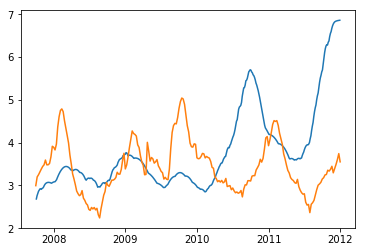

In [13]:
time_phyl_range = time_phyl[np.logical_and(time_phyl >= 2007.75, time_phyl <= 2012)]
effPop_range = effPop[np.logical_and(time_phyl >= 2007.75, time_phyl <= 2012)]

time_range = time[np.logical_and(time >= 2007.75, time <= 2012)]
ILI_range = 3 + np.log(ILI[np.logical_and(time >= 2007.75, time <= 2012)])

plt.plot(time_phyl_range, effPop_range)
plt.plot(time_range, ILI_range)
plt.show()

In [14]:
model = RBReg(time_phyl_range, effPop_range, time_range)
x_effPop = model.ym.reshape(model.ym.size)
y_ILI = ILI_range

[0.0, 0.0]


Number of line searches 31


[-2.4461877724473706, -0.2449334612099744]
-844.907404258


(223,)
(223,)


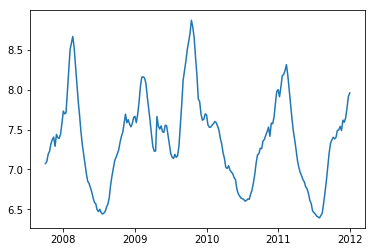

In [16]:
google_data = pd.read_csv(filepath_or_buffer = "/Users/RayneHernandez1/Desktop/NextFlu/Flu_Trends_Original.csv", header = 0)
range_start = np.argwhere(google_data["Date"] == "2007-09-30")
range_end = np.argwhere(google_data["Date"] == "2012-01-08")
flu_trend = np.array(google_data["United States"][range_start[0][0]:range_end[0][0]])
flu_trend = np.log(flu_trend)
print(flu_trend.shape)
print(time_range.shape)
plt.plot(time_range, flu_trend)
plt.show() 

(223,)
(223,)


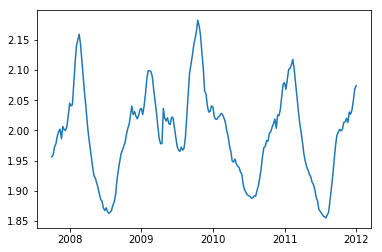

In [17]:
google_data = pd.read_csv(filepath_or_buffer = "/Users/RayneHernandez1/Desktop/NextFlu/FluTrends_Data.csv", header = 0)
range_start = np.argwhere(google_data["Date"] == "2007-09-30")
range_end = np.argwhere(google_data["Date"] == "2012-01-08")
flu_trend_rev = np.array(google_data["United States"][range_start[0][0]:range_end[0][0]])
flu_trend_rev = np.log(flu_trend)
print(flu_trend.shape)
print(time_range.shape)
plt.plot(time_range, flu_trend_rev)
plt.show() 

In [18]:
test_indices = np.argwhere(np.logical_and(time_range >= (2010 + (1/52)*39), time_range <= 2011 + (1/52)*38))
train_indices = np.argwhere(time_range <= (2010 + (1/52)*38))
x_train = time_range[train_indices]
y_train = y_ILI[train_indices]
x_test = time_range[test_indices]
y_test = y_ILI[test_indices]

flu_train = flu_trend[train_indices]
flu_test = flu_trend[test_indices]

flu_train_rev = flu_trend_rev[train_indices]
flu_test_rev = flu_trend_rev[test_indices]

effPop_train = np.log(x_effPop[train_indices])
effPop_test = np.log(x_effPop[test_indices])

In [56]:
sp.stats.pearsonr(y_train, np.exp(effPop_train))

(array([-0.15988079]), array([ 0.04548109]))

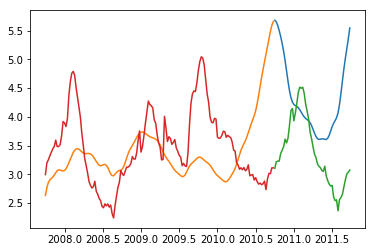

nan

In [47]:
plt.plot(x_test, np.exp(effPop_test))
plt.plot(x_train, np.exp(effPop_train))
plt.plot(x_test, y_test)
plt.plot(x_train, y_train)
plt.show()

np.corrcoef(y_test, flu_test)

Regression on Google FluTrends

Regression on CDC data only

In [25]:
x_train_curr = x_train.reshape(x_train.size)
x_train_curr = x_train_curr[0:-3]
y_train_curr = y_train.reshape(y_train.size)
y_train_curr = y_train_curr[0:-3]
x_test_curr = x_test.reshape(x_test.size) 
x_test_curr = np.concatenate((x_train_curr[-3:], x_test_curr))
y_test_curr = y_test.reshape(y_test.size)
y_test_curr = np.concatenate((y_train_curr[-3:], y_test_curr))
model = SMRegIter(Q = 5, D = 1, x = x_train_curr, y = y_train_curr, x_test = x_test_curr[0:4])
#plt.plot(x_test_curr, y_test_curr)
#plt.scatter(x_test_curr[0:4], model.ym)
#plt.show()
results_gp = np.array(model.ym.reshape(1, model.ym.size))
for i in range(1, y_test.size) :
    x_train_curr = np.append(x_train_curr, x_test_curr[0])
    x_train_curr = x_train_curr[-200:]
    x_test_curr = x_test_curr[1:]
    y_train_curr = np.append(y_train_curr, y_test_curr[0])
    y_train_curr = y_train_curr[-200:]
    y_test_curr = y_test_curr[1:]
    while True:
        try: 
            model = SMRegIter(Q = 5, D = 1, x = x_train_curr, y = y_train_curr, x_test = x_test_curr[0:4])
            break
        except: 
            pass
    #plt.plot(x_test_curr, y_test_curr)
    #plt.scatter(x_test_curr[0:4], model.ym)
    #plt.show()
    results_gp = np.vstack((results_gp, model.ym.reshape(1, model.ym.size))) 

x_train_curr = np.append(x_train_curr, x_test_curr[0])
x_train_curr = x_train_curr[-200:]
x_test_curr = x_test_curr[1:]
y_train_curr = np.append(y_train_curr, y_test_curr[0])
y_train_curr = y_train_curr[-200:]
y_test_curr = y_test_curr[1:]
while True:
    try: 
        model = SMRegIter(Q = 5, D = 1, x = x_train_curr, y = y_train_curr, x_test = x_test_curr[0:3])
        break
    except: 
        pass
results_gp = np.vstack((results_gp, np.append(model.ym.reshape(1, model.ym.size), 0)))

x_train_curr = np.append(x_train_curr, x_test_curr[0])
x_train_curr = x_train_curr[-200:]
x_test_curr = x_test_curr[1:]
y_train_curr = np.append(y_train_curr, y_test_curr[0])
y_train_curr = y_train_curr[-200:]
y_test_curr = y_test_curr[1:]
while True:
    try: 
        model = SMRegIter(Q = 5, D = 1, x = x_train_curr, y = y_train_curr, x_test = x_test_curr[0:2])
        break
    except: 
        pass
results_gp = np.vstack((results_gp, np.append(model.ym.reshape(1, model.ym.size), np.array([0, 0]))))

x_train_curr = np.append(x_train_curr, x_test_curr[0])
x_train_curr = x_train_curr[-200:]
x_test_curr = x_test_curr[1:]
y_train_curr = np.append(y_train_curr, y_test_curr[0])
y_train_curr = y_train_curr[-200:]
y_test_curr = y_test_curr[1:]
while True:
    try: 
        model = SMRegIter(Q = 5, D = 1, x = x_train_curr, y = y_train_curr, x_test = x_test_curr[0:1])
        break
    except: 
        pass
results_gp = np.vstack((results_gp, np.append(model.ym.reshape(1, model.ym.size), np.array([0, 0, 0]))))


Number of line searches 40
Number of line searches 40
adding jitter of 1.6226248456e+18 to diagnol of kernel matrix for numerical stability
adding jitter of 1.6226248456e+19 to diagnol of kernel matrix for numerical stability
adding jitter of 1.6226248456e+20 to diagnol of kernel matrix for numerical stability
adding jitter of 1.6226248456e+21 to diagnol of kernel matrix for numerical stability
adding jitter of 1.6226248456e+22 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4457929941e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4457929941e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4457929941e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4457929941e+15 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4457929941e+16 to diagnol of kernel matrix for numerical stability
adding jitter of 1.3677685792e+09 to diagnol of kernel matrix for numerical stability


adding jitter of 2.6174879821e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 1.3656161511e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 1.3656161511e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 1.3656161511e+15 to diagnol of kernel matrix for numerical stability
adding jitter of 1.3656161511e+16 to diagnol of kernel matrix for numerical stability
adding jitter of 1.3656161511e+17 to diagnol of kernel matrix for numerical stability
adding jitter of 3.6342694226e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 3.6342694226e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 3.6342694226e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 3.6342694226e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 3.6342694226e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 2.2234116879e+10 to diagnol of kernel

adding jitter of 3.7163118360e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 2.2822946446e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 2.2822946446e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 2.2822946446e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 2.2822946446e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 2.2822946446e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 8.6275762715e+06 to diagnol of kernel matrix for numerical stability
adding jitter of 8.6275762715e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 8.6275762715e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 8.6275762715e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 8.6275762715e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 3.1975113997e+07 to diagnol of kernel

adding jitter of 7.2468104390e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 7.2468104390e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 2.2777907273e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 2.2777907273e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 2.2777907273e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 2.2777907273e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 2.2777907273e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2714504399e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2714504399e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2714504399e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2714504399e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2714504399e+12 to diagnol of kernel

adding jitter of 1.8963451482e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 5.4387875621e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 5.4387875621e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 5.4387875621e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 5.4387875621e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 5.4387875621e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 3.8014657233e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 3.8014657233e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 3.8014657233e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 3.8014657233e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 3.8014657233e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 3.8070136231e+07 to diagnol of kernel

adding jitter of 3.8120200149e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 3.8120200149e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 3.8120200149e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 3.8120200149e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 3.8120200149e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 3.8120125528e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 3.8120125528e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 3.8120125528e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 3.8120125528e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 3.8120125528e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 3.8120088217e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 3.8120088217e+08 to diagnol of kernel

adding jitter of 5.7410238032e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 5.7410238032e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 5.7410238032e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 5.7410238032e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 5.7410238032e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 6.5818893484e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 6.5818893484e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 6.5818893484e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 6.5818893484e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 6.5818893484e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 3.1841204731e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 3.1841204731e+08 to diagnol of kernel

adding jitter of 2.5928411955e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 2.5928411955e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 2.5928411955e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 2.5928411955e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 2.5928411955e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 4.3405789235e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 4.3405789235e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 4.3405789235e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 4.3405789235e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 4.3405789235e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 6.3639842049e+06 to diagnol of kernel matrix for numerical stability
adding jitter of 6.3639842049e+07 to diagnol of kernel

adding jitter of 6.3126003674e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 6.3126003674e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 6.3126003674e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 6.3126003674e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 6.3125989688e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 6.3125989688e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 6.3125989688e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 6.3125989688e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 6.3125989688e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 6.3125982694e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 6.3125982694e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 6.3125982694e+10 to diagnol of kernel

adding jitter of 4.5040044339e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 4.5040044339e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 4.5040044339e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 4.5040044339e+12 to diagnol of kernel matrix for numerical stability
Number of line searches 40
adding jitter of 2.3557745412e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 2.3557745412e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 2.3557745412e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 2.3557745412e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 2.3557745412e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0476104185e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0476104185e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.04761041

adding jitter of 3.3755740228e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 3.3755740228e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 3.3755740228e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 3.3755740228e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 7.2682123530e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 7.2682123530e+15 to diagnol of kernel matrix for numerical stability
adding jitter of 7.2682123530e+16 to diagnol of kernel matrix for numerical stability
adding jitter of 7.2682123530e+17 to diagnol of kernel matrix for numerical stability
adding jitter of 7.2682123530e+18 to diagnol of kernel matrix for numerical stability
adding jitter of 2.3065437831e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 2.3065437831e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 2.3065437831e+10 to diagnol of kernel

adding jitter of 5.8192912989e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 5.8192912989e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 5.8192912989e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 5.8192912989e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 2.4025429828e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 2.4025429828e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 2.4025429828e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 2.4025429828e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 2.4025429828e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 2.0213714773e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 2.0213714773e+15 to diagnol of kernel matrix for numerical stability
adding jitter of 2.0213714773e+16 to diagnol of kernel

adding jitter of 4.7789657204e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 4.7789657204e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 4.7789657204e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 4.7789657204e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 5.4621603566e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 5.4621603566e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 5.4621603566e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 5.4621603566e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 5.4621603566e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 4.5022285008e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 4.5022285008e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 4.5022285008e+09 to diagnol of kernel

adding jitter of 3.0415564490e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 3.0415564490e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 3.0415564490e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 3.0415564490e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 3.0415564490e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0295595014e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0295595014e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0295595014e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0295595014e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0295595014e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.9956471512e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.9956471512e+08 to diagnol of kernel

adding jitter of 4.6541093356e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 5.6696458853e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 5.6696458853e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 5.6696458853e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 5.6696458853e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 5.6696458853e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 4.6369918961e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 4.6369918961e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 4.6369918961e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 4.6369918961e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 4.6369918961e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 5.2413285918e+07 to diagnol of kernel

adding jitter of 1.5059802970e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1137717124e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1137717124e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1137717124e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1137717124e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1137717124e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 9.5783712005e+06 to diagnol of kernel matrix for numerical stability
adding jitter of 9.5783712005e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 9.5783712005e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 9.5783712005e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 9.5783712005e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 8.4484171052e+06 to diagnol of kernel

adding jitter of 1.0910812963e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 6.6556877372e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 6.6556877372e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 6.6556877372e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 6.6556877372e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 6.6556877372e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 6.4316274055e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 6.4316274055e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 6.4316274055e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 6.4316274055e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 6.4316274055e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 4.1318235352e+07 to diagnol of kernel

adding jitter of 4.7906654701e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 4.7906654701e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 4.7906654701e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 4.7906654701e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 4.7906654701e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 4.7865117922e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 4.7865117922e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 4.7865117922e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 4.7865117922e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 4.7865117922e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 4.7844363273e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 4.7844363273e+08 to diagnol of kernel

adding jitter of 1.4488159663e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4488159663e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4488159663e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4488159663e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.3763701139e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.3763701139e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.3763701139e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.3763701139e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.3763701139e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1908139445e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1908139445e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1908139445e+09 to diagnol of kernel

adding jitter of 2.5632154261e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 2.5632154261e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 2.5632154261e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 7.5341874026e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 7.5341874026e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 7.5341874026e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 7.5341874026e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 7.5341874026e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4951085620e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4951085620e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4951085620e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4951085620e+10 to diagnol of kernel

adding jitter of 3.0841111354e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 3.0841111354e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 3.0841106429e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 3.0841106429e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 3.0841106429e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 3.0841106429e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 3.0841106429e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 3.0841103967e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 3.0841103967e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 3.0841103967e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 3.0841103967e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 3.0841103967e+11 to diagnol of kernel

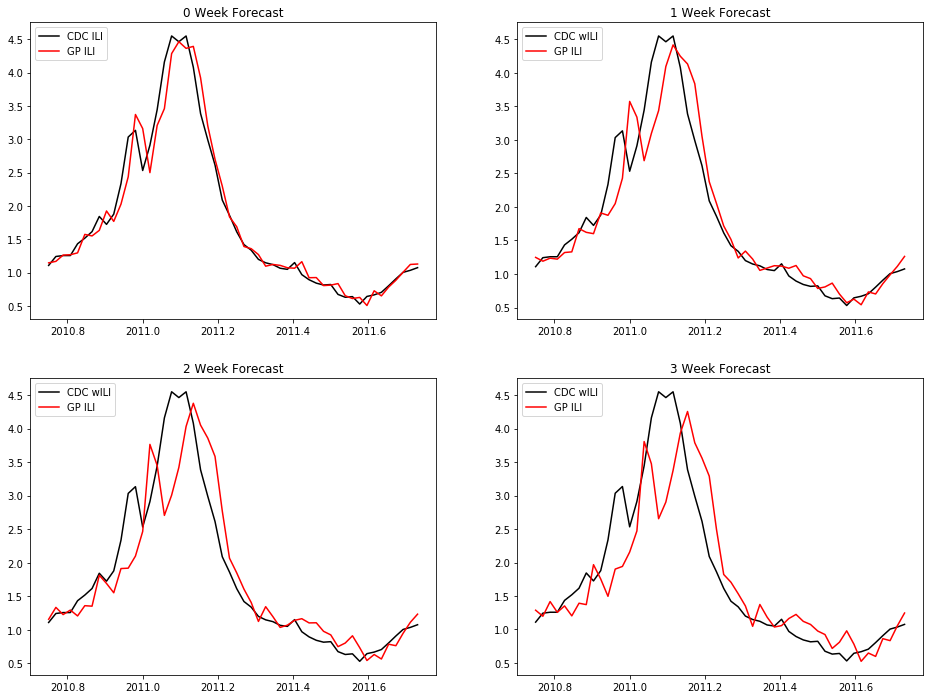

      Correlation       MAE       MSE      RMSE
0 wk     0.981558  0.141072  0.047669  0.218332
1 wk     0.938384  0.252600  0.156082  0.395073
2 wk     0.902325  0.312965  0.243347  0.493303
3 wk     0.862509  0.397064  0.336206  0.579832


In [51]:
plotGraphs("GP ILI", results_gp)

In [29]:
np.savetxt(fname = "/Users/RayneHernandez1/Desktop/NextFlu/results_gp.csv", X = results_gp, delimiter = ",")

In [ ]:
results_gp = np.loadtxt(fname = "/Users/RayneHernandez1/Desktop/NextFlu/results_gp.csv")

GP Regression on effPop 

In [30]:
x_train_curr = x_train.reshape(x_train.size)
x_train_curr = x_train_curr[0:-3]
pop_train_curr = effPop_train.reshape(effPop_train.size)
pop_train_curr = pop_train_curr[0:-3]
x_test_curr = x_test.reshape(x_test.size) 
x_test_curr = np.concatenate((x_train_curr[-3:], x_test_curr))
pop_test_curr = effPop_test.reshape(effPop_test.size)
pop_test_curr = np.concatenate((pop_train_curr[-3:], pop_test_curr))
while True:
    try: 
        model = SMRegIter(Q = 5, D = 1, x = x_train_curr, y = pop_train_curr, x_test = x_test_curr[0:4])
        break
    except: 
        pass
#plt.plot(x_test_curr, y_test_curr)
#plt.scatter(x_test_curr[0:4], model.ym)
#plt.show()
results_eff = np.array(model.ym.reshape(1, model.ym.size))
for i in range(1, y_test.size) :
    x_train_curr = np.append(x_train_curr, x_test_curr[0])
    x_train_curr = x_train_curr[-200:]
    x_test_curr = x_test_curr[1:]
    pop_train_curr = np.append(pop_train_curr, pop_test_curr[0])
    pop_train_curr = pop_train_curr[-200:]
    pop_test_curr = pop_test_curr[1:]
    while True:
        try: 
            model = SMRegIter(Q = 5, D = 1, x = x_train_curr, y = pop_train_curr, x_test = x_test_curr[0:4])
            break
        except: 
            pass
    #plt.plot(x_test_curr, y_test_curr)
    #plt.scatter(x_test_curr[0:4], model.ym)
    #plt.show()
    results_eff = np.vstack((results_eff, model.ym.reshape(1, model.ym.size))) 

x_train_curr = np.append(x_train_curr, x_test_curr[0])
x_train_curr = x_train_curr[-200:]
x_test_curr = x_test_curr[1:]
pop_train_curr = np.append(pop_train_curr, pop_test_curr[0])
pop_train_curr = pop_train_curr[-200:]
pop_test_curr = pop_test_curr[1:]
while True:
    try: 
        model = SMRegIter(Q = 5, D = 1, x = x_train_curr, y = pop_train_curr, x_test = x_test_curr[0:3])
        break
    except: 
        pass
results_eff = np.vstack((results_eff, np.append(model.ym.reshape(1, model.ym.size), 0)))

x_train_curr = np.append(x_train_curr, x_test_curr[0])
x_train_curr = x_train_curr[-200:]
x_test_curr = x_test_curr[1:]
pop_train_curr = np.append(pop_train_curr, pop_test_curr[0])
pop_train_curr = pop_train_curr[-200:]
pop_test_curr = pop_test_curr[1:]
while True:
    try: 
        model = SMRegIter(Q = 5, D = 1, x = x_train_curr, y = pop_train_curr, x_test = x_test_curr[0:2])
        break
    except: 
        pass
results_eff = np.vstack((results_eff, np.append(model.ym.reshape(1, model.ym.size), np.array([0, 0]))))

x_train_curr = np.append(x_train_curr, x_test_curr[0])
x_train_curr = x_train_curr[-200:]
x_test_curr = x_test_curr[1:]
pop_train_curr = np.append(pop_train_curr, pop_test_curr[0])
pop_train_curr = pop_train_curr[-200:]
pop_test_curr = pop_test_curr[1:]
while True:
    try: 
        model = SMRegIter(Q = 5, D = 1, x = x_train_curr, y = pop_train_curr, x_test = x_test_curr[0:1])
        break
    except: 
        pass
results_eff = np.vstack((results_eff, np.append(model.ym.reshape(1, model.ym.size), np.array([0, 0, 0]))))


adding jitter of 3.2517537268e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 3.2517537268e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 3.2517537268e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 3.2517537268e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 3.2517537268e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 4.0002999961e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 4.0002999961e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 4.0002999961e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 4.0002999961e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 4.0002999961e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 2.3403910076e+06 to diagnol of kernel matrix for numerical stability
adding jitter of 2.3403910076e+07 to diagnol of kernel

adding jitter of 9.7211272422e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 9.7211272422e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 9.7211272422e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 9.7211272422e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 1.8423970139e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.8423970139e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.8423970139e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.8423970139e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.8423970139e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 8.1774775129e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 8.1774775129e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 8.1774775129e+12 to diagnol of kernel

adding jitter of 4.8410720811e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 4.8410720811e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 4.8410720811e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 4.8410720811e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 5.5117958925e+06 to diagnol of kernel matrix for numerical stability
adding jitter of 5.5117958925e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 5.5117958925e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 5.5117958925e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 5.5117958925e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0758441745e+06 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0758441745e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0758441745e+08 to diagnol of kernel

adding jitter of 7.0359871655e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 7.0359871655e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 7.0359871655e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 7.0359871655e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2481480104e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2481480104e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2481480104e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2481480104e+15 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2481480104e+16 to diagnol of kernel matrix for numerical stability
adding jitter of 5.0552731484e+06 to diagnol of kernel matrix for numerical stability
adding jitter of 5.0552731484e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 5.0552731484e+08 to diagnol of kernel

adding jitter of 7.0430189043e+06 to diagnol of kernel matrix for numerical stability
adding jitter of 7.0430189043e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 7.0430189043e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 7.0430189043e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2578583734e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2578583734e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2578583734e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2578583734e+15 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2578583734e+16 to diagnol of kernel matrix for numerical stability
adding jitter of 2.2591833852e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 2.2591833852e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 2.2591833852e+09 to diagnol of kernel

adding jitter of 3.2872970195e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 3.2872970195e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 3.2872970195e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 3.2872970195e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 8.8204619171e+06 to diagnol of kernel matrix for numerical stability
adding jitter of 8.8204619171e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 8.8204619171e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 8.8204619171e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 8.8204619171e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4463020148e+06 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4463020148e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4463020148e+08 to diagnol of kernel

adding jitter of 1.7304338132e+19 to diagnol of kernel matrix for numerical stability
adding jitter of 1.7304338132e+20 to diagnol of kernel matrix for numerical stability
adding jitter of 1.7304338132e+21 to diagnol of kernel matrix for numerical stability
adding jitter of 1.7304338132e+22 to diagnol of kernel matrix for numerical stability
adding jitter of 5.6776713903e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 5.6776713903e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 5.6776713903e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 5.6776713903e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 5.6776713903e+15 to diagnol of kernel matrix for numerical stability
adding jitter of 3.2858055429e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 3.2858055429e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 3.2858055429e+10 to diagnol of kernel

adding jitter of 1.4185418956e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4185418956e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4185418956e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4185418956e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1735989449e+06 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1735989449e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1735989449e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1735989449e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1735989449e+10 to diagnol of kernel matrix for numerical stability
Number of line searches 11
Number of line searches 30
adding jitter of 1.5194948339e+06 to diagnol of kernel matrix for numerical stability
adding jitter of 1.5194948339e+07 to diagnol of kernel matrix for numerical stability


adding jitter of 4.6355346180e+06 to diagnol of kernel matrix for numerical stability
adding jitter of 4.6355346180e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 4.6355346180e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 4.6355346180e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 2.8870201093e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 2.8870201093e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 2.8870201093e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 2.8870201093e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 2.8870201093e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 2.3549778134e+06 to diagnol of kernel matrix for numerical stability
adding jitter of 2.3549778134e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 2.3549778134e+08 to diagnol of kernel

adding jitter of 9.0985020018e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 9.0985020018e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 9.0985020018e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 9.0985020018e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 7.0501823780e+05 to diagnol of kernel matrix for numerical stability
adding jitter of 7.0501823780e+06 to diagnol of kernel matrix for numerical stability
adding jitter of 7.0501823780e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 7.0501823780e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 7.0501823780e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1780068626e+06 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1780068626e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1780068626e+08 to diagnol of kernel

adding jitter of 2.0380451722e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 2.0380451722e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 2.0380451722e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 2.0380451722e+10 to diagnol of kernel matrix for numerical stability
Number of line searches 6
Number of line searches 40
adding jitter of 5.8756946129e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 5.8756946129e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 5.8756946129e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 5.8756946129e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 5.8756946129e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 6.8995737170e+06 to diagnol of kernel matrix for numerical stability
adding jitter of 6.8995737170e+07 to diagnol of kernel matrix for numerical stability
a

adding jitter of 8.7843622107e+06 to diagnol of kernel matrix for numerical stability
adding jitter of 8.7843622107e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 8.7843622107e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 8.7843622107e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4536740139e+06 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4536740139e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4536740139e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4536740139e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.4536740139e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.7180023914e+06 to diagnol of kernel matrix for numerical stability
adding jitter of 1.7180023914e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.7180023914e+08 to diagnol of kernel

adding jitter of 3.0834873164e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 3.0834873164e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 3.0834873164e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 3.0834873164e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 2.0611041882e+06 to diagnol of kernel matrix for numerical stability
adding jitter of 2.0611041882e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 2.0611041882e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 2.0611041882e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 2.0611041882e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 8.8095496877e+05 to diagnol of kernel matrix for numerical stability
adding jitter of 8.8095496877e+06 to diagnol of kernel matrix for numerical stability
adding jitter of 8.8095496877e+07 to diagnol of kernel

adding jitter of 1.0904943851e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0904943851e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0904943851e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0904943851e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 5.2025069745e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 5.2025069745e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 5.2025069745e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 5.2025069745e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 5.2025069745e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 4.6395221272e+06 to diagnol of kernel matrix for numerical stability
adding jitter of 4.6395221272e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 4.6395221272e+08 to diagnol of kernel

adding jitter of 1.0456440443e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0456440443e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0456440443e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0456440443e+15 to diagnol of kernel matrix for numerical stability
adding jitter of 1.6733620364e+06 to diagnol of kernel matrix for numerical stability
adding jitter of 1.6733620364e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.6733620364e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.6733620364e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.6733620364e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 5.1154812417e+20 to diagnol of kernel matrix for numerical stability
adding jitter of 5.1154812417e+21 to diagnol of kernel matrix for numerical stability
adding jitter of 5.1154812417e+22 to diagnol of kernel

adding jitter of 3.7591341809e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 3.7591341809e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 3.7591341809e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 3.7591341809e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 5.1586028609e+05 to diagnol of kernel matrix for numerical stability
adding jitter of 5.1586028609e+06 to diagnol of kernel matrix for numerical stability
adding jitter of 5.1586028609e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 5.1586028609e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 5.1586028609e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 5.0931140125e+05 to diagnol of kernel matrix for numerical stability
adding jitter of 5.0931140125e+06 to diagnol of kernel matrix for numerical stability
adding jitter of 5.0931140125e+07 to diagnol of kernel

adding jitter of 9.0550152993e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 9.0550152993e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 9.0550152993e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 9.0550152993e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.7971220322e+06 to diagnol of kernel matrix for numerical stability
adding jitter of 1.7971220322e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.7971220322e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.7971220322e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.7971220322e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 4.0331839211e+06 to diagnol of kernel matrix for numerical stability
adding jitter of 4.0331839211e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 4.0331839211e+08 to diagnol of kernel

adding jitter of 2.6185702741e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 2.6185702741e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 2.6185702741e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 2.6185702741e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 7.9290223853e+05 to diagnol of kernel matrix for numerical stability
adding jitter of 7.9290223853e+06 to diagnol of kernel matrix for numerical stability
adding jitter of 7.9290223853e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 7.9290223853e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 7.9290223853e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 7.5771755297e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 7.5771755297e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 7.5771755297e+15 to diagnol of kernel

adding jitter of 7.9854933273e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 7.9854933273e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 7.9854933273e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 8.0594505857e+05 to diagnol of kernel matrix for numerical stability
adding jitter of 8.0594505857e+06 to diagnol of kernel matrix for numerical stability
adding jitter of 8.0594505857e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 8.0594505857e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 8.0594505857e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2973464313e+06 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2973464313e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2973464313e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2973464313e+09 to diagnol of kernel

adding jitter of 1.1601922428e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1601922428e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1601922428e+15 to diagnol of kernel matrix for numerical stability
adding jitter of 3.9517543079e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 3.9517543079e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 3.9517543079e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 3.9517543079e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 3.9517543079e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2703728230e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2703728230e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2703728230e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2703728230e+10 to diagnol of kernel

adding jitter of 5.4185869660e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 5.4185869660e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 5.4185869660e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 2.6800107357e+06 to diagnol of kernel matrix for numerical stability
adding jitter of 2.6800107357e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 2.6800107357e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 2.6800107357e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 2.6800107357e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.6652703521e+06 to diagnol of kernel matrix for numerical stability
adding jitter of 1.6652703521e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.6652703521e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.6652703521e+09 to diagnol of kernel

adding jitter of 1.2158990170e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2158990170e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2158990170e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 7.7758359570e+05 to diagnol of kernel matrix for numerical stability
adding jitter of 7.7758359570e+06 to diagnol of kernel matrix for numerical stability
adding jitter of 7.7758359570e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 7.7758359570e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 7.7758359570e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 4.2808811836e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 4.2808811836e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 4.2808811836e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 4.2808811836e+10 to diagnol of kernel

adding jitter of 2.1732316210e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 2.1732316210e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 2.0398090296e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 2.0398090296e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 2.0398090296e+15 to diagnol of kernel matrix for numerical stability
adding jitter of 2.0398090296e+16 to diagnol of kernel matrix for numerical stability
adding jitter of 2.0398090296e+17 to diagnol of kernel matrix for numerical stability
adding jitter of 2.2506932206e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 2.2506932206e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 2.2506932206e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 2.2506932206e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 2.2506932206e+11 to diagnol of kernel

adding jitter of 4.5066680124e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 4.5066680124e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 3.7209619046e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 3.7209619046e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 3.7209619046e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 3.7209619046e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 3.7209619046e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2280062018e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2280062018e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2280062018e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2280062018e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 1.2280062018e+13 to diagnol of kernel

adding jitter of 2.9388811440e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 2.9388811440e+10 to diagnol of kernel matrix for numerical stability
Number of line searches 8
adding jitter of 1.7776721054e+14 to diagnol of kernel matrix for numerical stability
adding jitter of 1.7776721054e+15 to diagnol of kernel matrix for numerical stability
adding jitter of 1.7776721054e+16 to diagnol of kernel matrix for numerical stability
adding jitter of 1.7776721054e+17 to diagnol of kernel matrix for numerical stability
adding jitter of 1.7776721054e+18 to diagnol of kernel matrix for numerical stability
adding jitter of 8.8772505920e+06 to diagnol of kernel matrix for numerical stability
adding jitter of 8.8772505920e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 8.8772505920e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 8.8772505920e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 8.877250592

adding jitter of 3.9388826727e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 3.9388826727e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 9.2460556718e+05 to diagnol of kernel matrix for numerical stability
adding jitter of 9.2460556718e+06 to diagnol of kernel matrix for numerical stability
adding jitter of 9.2460556718e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 9.2460556718e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 9.2460556718e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 2.5365574840e+06 to diagnol of kernel matrix for numerical stability
adding jitter of 2.5365574840e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 2.5365574840e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 2.5365574840e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 2.5365574840e+10 to diagnol of kernel

adding jitter of 2.4636302155e+19 to diagnol of kernel matrix for numerical stability
adding jitter of 2.4636302155e+20 to diagnol of kernel matrix for numerical stability
adding jitter of 7.2122790199e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 7.2122790199e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 7.2122790199e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 7.2122790199e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 7.2122790199e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 4.2191393393e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 4.2191393393e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 4.2191393393e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 4.2191393393e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 4.2191393393e+11 to diagnol of kernel

adding jitter of 1.7665336831e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.7665336831e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 9.2530860028e+05 to diagnol of kernel matrix for numerical stability
adding jitter of 9.2530860028e+06 to diagnol of kernel matrix for numerical stability
adding jitter of 9.2530860028e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 9.2530860028e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 9.2530860028e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 8.1904976835e+05 to diagnol of kernel matrix for numerical stability
adding jitter of 8.1904976835e+06 to diagnol of kernel matrix for numerical stability
adding jitter of 8.1904976835e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 8.1904976835e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 8.1904976835e+09 to diagnol of kernel

adding jitter of 1.1040551230e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 1.1040551230e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 5.6099754767e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 5.6099754767e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 5.6099754767e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 5.6099754767e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 5.6099754767e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0360805742e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0360805742e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0360805742e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0360805742e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 1.0360805742e+11 to diagnol of kernel

adding jitter of 4.5630374985e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 4.5630374985e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 3.1151097456e+06 to diagnol of kernel matrix for numerical stability
adding jitter of 3.1151097456e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 3.1151097456e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 3.1151097456e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 3.1151097456e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 3.0749162935e+06 to diagnol of kernel matrix for numerical stability
adding jitter of 3.0749162935e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 3.0749162935e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 3.0749162935e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 3.0749162935e+10 to diagnol of kernel

adding jitter of 2.8341064142e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 2.8341064142e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 3.2746544011e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 3.2746544011e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 3.2746544011e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 3.2746544011e+12 to diagnol of kernel matrix for numerical stability
adding jitter of 3.2746544011e+13 to diagnol of kernel matrix for numerical stability
adding jitter of 3.8937756382e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 3.8937756382e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 3.8937756382e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 3.8937756382e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 3.8937756382e+11 to diagnol of kernel

adding jitter of 6.7533734867e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 6.7533734867e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 5.2153033673e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 5.2153033673e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 5.2153033673e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 5.2153033673e+10 to diagnol of kernel matrix for numerical stability
adding jitter of 5.2153033673e+11 to diagnol of kernel matrix for numerical stability
adding jitter of 2.3108456878e+06 to diagnol of kernel matrix for numerical stability
adding jitter of 2.3108456878e+07 to diagnol of kernel matrix for numerical stability
adding jitter of 2.3108456878e+08 to diagnol of kernel matrix for numerical stability
adding jitter of 2.3108456878e+09 to diagnol of kernel matrix for numerical stability
adding jitter of 2.3108456878e+10 to diagnol of kernel

In [42]:
np.savetxt(fname = "/Users/RayneHernandez1/Desktop/NextFlu/results_eff.csv", X = results_eff, delimiter = ",")

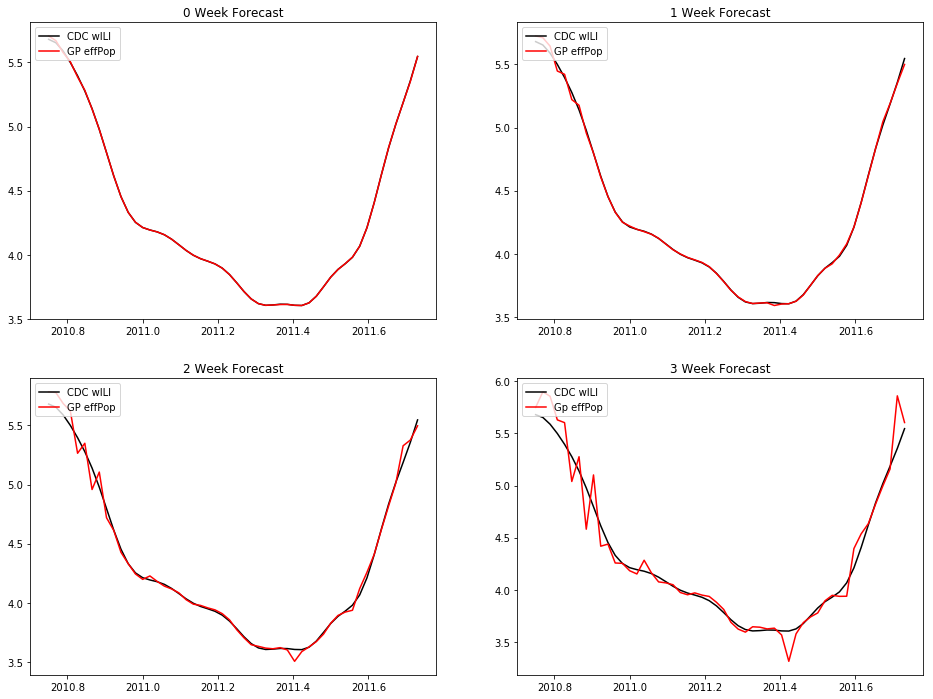

      Correlation       MAE       MSE      RMSE
0 wk     0.999973  0.001926  0.000025  2.903474
1 wk     0.999547  0.010812  0.000398  0.019948
2 wk     0.996610  0.035093  0.003303  0.057475
3 wk     0.983268  0.086429  0.019443  0.139437


In [31]:
plt.subplot(2, 2, 1)
plt.plot(x_test, np.exp(effPop_test), label = "CDC wILI", color = "black")
plt.plot(x_test, np.exp(results_eff[3:,0]), label = "GP effPop", color = "red")
plt.title("0 Week Forecast")
plt.legend(loc='upper left')

plt.subplot(2, 2, 2)
plt.plot(x_test, np.exp(effPop_test), label = "CDC wILI", color = "black")
plt.plot(x_test, np.exp(results_eff[2:-1,1]), label = "GP effPop", color = "red")
plt.title("1 Week Forecast")
plt.legend(loc='upper left')

plt.subplot(2, 2, 3)
plt.plot(x_test, np.exp(effPop_test), label = "CDC wILI", color = "black")
plt.plot(x_test, np.exp(results_eff[1:-2,2]), label = "GP effPop", color = "red")
plt.title("2 Week Forecast")
plt.legend(loc='upper left')

plt.subplot(2, 2, 4)
plt.plot(x_test, np.exp(effPop_test), label = "CDC wILI", color = "black")
plt.plot(x_test, np.exp(results_eff[0:-3,3]), label = "Gp effPop", color = "red")
plt.title("3 Week Forecast")
plt.legend(loc='upper left')

plt.show()
plt.figure(figsize = (16, 12))


correlation_eff = np.array([np.corrcoef(np.exp(effPop_test).reshape(y_test.size), np.exp(results_eff[3:,0]))[0][1], 
                       np.corrcoef(np.exp(effPop_test).reshape(y_test.size), np.exp(results_eff[2:-1,1]))[0][1],
                       np.corrcoef(np.exp(effPop_test).reshape(y_test.size), np.exp(results_eff[1:-2,2]))[0][1],
                       np.corrcoef(np.exp(effPop_test).reshape(y_test.size), np.exp(results_eff[0:-3,3]))[0][1]])
rmse_eff = np.sqrt(np.array([mt.mean_squared_error(np.exp(y_test - 3).reshape(y_test.size), np.exp(results_eff[3:,0])),
                 mt.mean_squared_error(np.exp(effPop_test).reshape(y_test.size), np.exp(results_eff[2:-1,1])),
                 mt.mean_squared_error(np.exp(effPop_test).reshape(y_test.size), np.exp(results_eff[1:-2,2])),
                 mt.mean_squared_error(np.exp(effPop_test).reshape(y_test.size), np.exp(results_eff[0:-3,3]))]))
mse_eff = np.array([mt.mean_squared_error(np.exp(effPop_test).reshape(y_test.size), np.exp(results_eff[3:,0])),
                 mt.mean_squared_error(np.exp(effPop_test).reshape(y_test.size), np.exp(results_eff[2:-1,1])),
                 mt.mean_squared_error(np.exp(effPop_test).reshape(y_test.size), np.exp(results_eff[1:-2,2])),
                 mt.mean_squared_error(np.exp(effPop_test).reshape(y_test.size), np.exp(results_eff[0:-3,3]))])
mae_eff = np.array([mt.mean_absolute_error(np.exp(effPop_test).reshape(y_test.size), np.exp(results_eff[3:,0])),
                 mt.mean_absolute_error(np.exp(effPop_test).reshape(y_test.size), np.exp(results_eff[2:-1,1])),
                 mt.mean_absolute_error(np.exp(effPop_test).reshape(y_test.size), np.exp(results_eff[1:-2,2])),
                 mt.mean_absolute_error(np.exp(effPop_test).reshape(y_test.size), np.exp(results_eff[0:-3,3]))])

d_eff = {"Correlation": correlation_eff, "RMSE": rmse_eff, "MSE": mse_eff, "MAE": mae_eff}
df_eff = pd.DataFrame(data=d_eff, index = ["0 wk", "1 wk", "2 wk", "3 wk"])
print(df_eff)

Running ARIMAX on effPop alone

In [58]:
y_train_curr = y_train.reshape(y_train.size)
y_train_curr = y_train_curr[0:-3]
y_test_curr = y_test.reshape(y_test.size)
y_test_curr = np.concatenate((y_train_curr[-3:], y_test_curr))
pop_train_curr = effPop_train.reshape(effPop_train.size)
pop_train_curr = pop_train_curr[0:-3]
pop_test_curr = effPop_test.reshape(effPop_test.size)
pop_test_curr = np.concatenate((pop_train_curr[-3:], pop_test_curr))
results_train = np.array([0,0,0,0]).reshape(1,4)
results_test = results_eff
d_train = {'y':y_train_curr, 'pop':pop_train_curr}
df_train = pd.DataFrame(data=d_train)
d_test = {'y': y_test_curr[0:4], 'pop':np.append(pop_test_curr[0:1], results_test[0,1:])}
df_test = pd.DataFrame.from_dict(data=d_test)
model = pf.ARIMAX(data=df_train, formula='y~pop', ar=2, ma=0, family=pf.Normal())
model.fit(method="MLE")
forecast = model.predict(h = 4, oos_data = df_test, intervals=False)
results_SAR_eff = np.array(forecast).reshape(1,forecast.size)
for i in range(1, y_test.size) :
    y_train_curr = np.append(y_train_curr, y_test_curr[0])
    y_train_curr = y_train_curr[-200:]
    y_test_curr = y_test_curr[1:]
    pop_train_curr = np.append(pop_train_curr, pop_test_curr[0])
    pop_train_curr = pop_train_curr[-200:]
    pop_test_curr = pop_test_curr[1:]
    results_train = np.vstack((results_train, results_test[0,]))
    results_test = results_test[1:,]
    d_train = {'y':y_train_curr, 'pop':pop_train_curr}
    df_train = pd.DataFrame(data=d_train)
    d_test = {'y': y_test_curr[0:4], 'pop':np.append(pop_test_curr[0:1], results_test[0,1:])}
    df_test = pd.DataFrame.from_dict(data=d_test)
    model = pf.ARIMAX(data=df_train, formula='y~pop', ar=2, ma=0, family=pf.Normal())
    model.fit(method="MLE")
    forecast = model.predict(h = 4, oos_data = df_test, intervals=False)
    results_SAR_eff = np.vstack((results_SAR_eff, np.array(forecast).reshape(1, forecast.size)))

y_train_curr = np.append(y_train_curr, y_test_curr[0])
y_train_curr = y_train_curr[-200:]
y_test_curr = y_test_curr[1:]
pop_train_curr = np.append(pop_train_curr, pop_test_curr[0])
pop_train_curr = pop_train_curr[-200:]
pop_test_curr = pop_test_curr[1:]
results_train = np.vstack((results_train, results_test[0,]))
results_test = results_test[1:,]
d_train = {'y':y_train_curr, 'pop':pop_train_curr}
df_train = pd.DataFrame(data=d_train)
d_test = {'y': y_test_curr[0:3], 'pop':np.append(pop_test_curr[0:1], results_test[0,1:3])}
df_test = pd.DataFrame.from_dict(data=d_test)
model = pf.ARIMAX(data=df_train, formula='y~pop', ar=2, ma=0, family=pf.Normal())
model.fit(method="MLE")
forecast = model.predict(h = 3, oos_data = df_test, intervals=False)
results_SAR_eff = np.vstack((results_SAR_eff, np.append(np.array(forecast).reshape(1, forecast.size), 0)))

y_train_curr = np.append(y_train_curr, y_test_curr[0])
y_train_curr = y_train_curr[-200:]
y_test_curr = y_test_curr[1:]
pop_train_curr = np.append(pop_train_curr, pop_test_curr[0])
pop_train_curr = pop_train_curr[-200:]
pop_test_curr = pop_test_curr[1:]
results_train = np.vstack((results_train, results_test[0,]))
results_test = results_test[1:,]
d_train = {'y':y_train_curr, 'pop':pop_train_curr}
df_train = pd.DataFrame(data=d_train)
d_test = {'y': y_test_curr[0:2], 'pop':np.append(pop_test_curr[0:1], results_test[0,1:2])}
df_test = pd.DataFrame.from_dict(data=d_test)
model = pf.ARIMAX(data=df_train, formula='y~pop', ar=2, ma=0, family=pf.Normal())
model.fit(method="MLE")
forecast = model.predict(h = 2, oos_data = df_test, intervals=False)
results_SAR_eff = np.vstack((results_SAR_eff, np.append(np.array(forecast).reshape(1, forecast.size), np.array([0,0]))))

y_train_curr = np.append(y_train_curr, y_test_curr[0])
y_train_curr = y_train_curr[-200:]
y_test_curr = y_test_curr[1:]
pop_train_curr = np.append(pop_train_curr, pop_test_curr[0])
pop_train_curr = pop_train_curr[-200:]
pop_test_curr = pop_test_curr[1:]
results_train = np.vstack((results_train, results_test[0,]))
results_test = results_test[1:,]
d_train = {'y':y_train_curr, 'pop':pop_train_curr}
df_train = pd.DataFrame(data=d_train)
d_test = {'y': y_test_curr[0:1], 'pop':pop_test_curr[0:1]}
df_test = pd.DataFrame.from_dict(data=d_test)
model = pf.ARIMAX(data=df_train, formula='y~pop', ar=2, ma=0, family=pf.Normal())
model.fit(method="MLE")
forecast = model.predict(h = 1, oos_data = df_test, intervals=False)
results_SAR_eff = np.vstack((results_SAR_eff, np.append(np.array(forecast).reshape(1, forecast.size), np.array([0,0,0]))))

NameError: name 'results_eff' is not defined

In [39]:
np.savetxt(fname = "/Users/RayneHernandez1/Desktop/NextFlu/results_sar_eff.csv", X = results_SAR_eff, delimiter = ",")

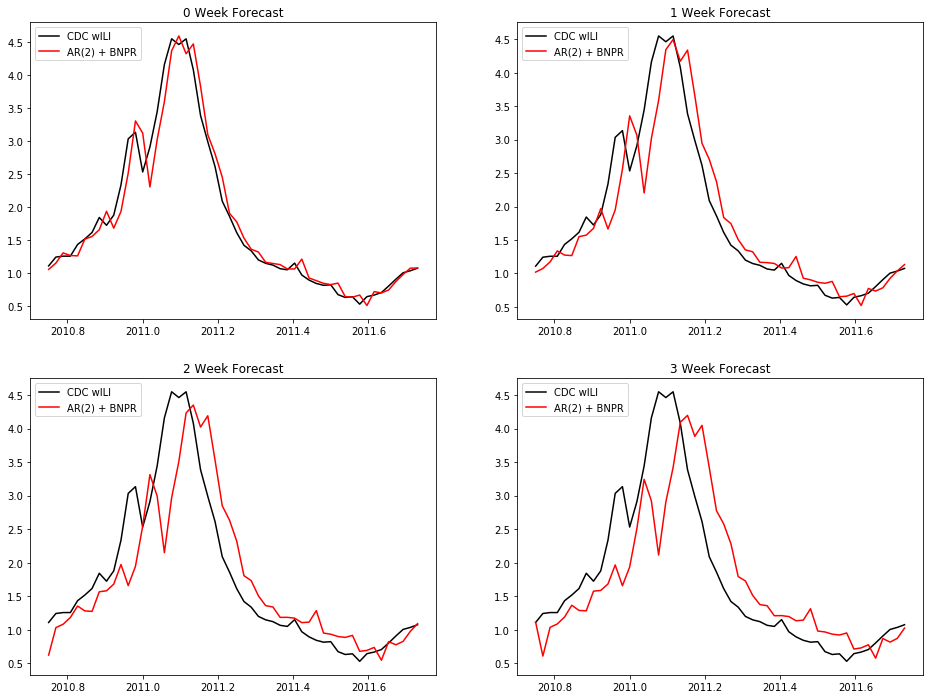

      Correlation       MAE       MSE      RMSE
0 wk     0.980102  0.154572  0.051428  0.226777
1 wk     0.928439  0.279515  0.180686  0.425072
2 wk     0.862691  0.395641  0.337609  0.581041
3 wk     0.787833  0.508796  0.504285  0.710130


In [33]:
plt.subplot(2, 2, 1)
plt.plot(x_test, np.exp(y_test - 3), label = "CDC wILI", color = "black")
plt.plot(x_test, np.exp(results_SAR_eff[3:,0] - 3), label = "AR(2) + BNPR", color = "red")
plt.title("0 Week Forecast")
plt.legend(loc='upper left')

plt.subplot(2, 2, 2)
plt.plot(x_test, np.exp(y_test - 3), label = "CDC wILI", color = "black")
plt.plot(x_test, np.exp(results_SAR_eff[2:-1,1] - 3), label = "AR(2) + BNPR", color = "red")
plt.title("1 Week Forecast")
plt.legend(loc='upper left')

plt.subplot(2, 2, 3)
plt.plot(x_test, np.exp(y_test - 3), label = "CDC wILI", color = "black")
plt.plot(x_test, np.exp(results_SAR_eff[1:-2,2] - 3), label = "AR(2) + BNPR", color = "red")
plt.title("2 Week Forecast")
plt.legend(loc='upper left')

plt.subplot(2, 2, 4)
plt.plot(x_test, np.exp(y_test - 3), label = "CDC wILI", color = "black")
plt.plot(x_test, np.exp(results_SAR_eff[0:-3,3] - 3), label = "AR(2) + BNPR", color = "red")
plt.title("3 Week Forecast")
plt.legend(loc='upper left')

plt.show()
plt.figure(figsize = (16, 12))


correlation_sar_eff = np.array([np.corrcoef(np.exp(y_test - 3).reshape(y_test.size), np.exp(results_SAR_eff[3:,0] - 3))[0][1], 
                       np.corrcoef(np.exp(y_test - 3).reshape(y_test.size), np.exp(results_SAR_eff[2:-1,1] - 3))[0][1],
                       np.corrcoef(np.exp(y_test - 3).reshape(y_test.size), np.exp(results_SAR_eff[1:-2,2] - 3))[0][1],
                       np.corrcoef(np.exp(y_test - 3).reshape(y_test.size), np.exp(results_SAR_eff[0:-3,3] - 3))[0][1]])
rmse_sar_eff = np.sqrt(np.array([mt.mean_squared_error(np.exp(y_test - 3).reshape(y_test.size), np.exp(results_SAR_eff[3:,0] - 3)),
                 mt.mean_squared_error(np.exp(y_test - 3).reshape(y_test.size), np.exp(results_SAR_eff[2:-1,1] - 3)),
                 mt.mean_squared_error(np.exp(y_test - 3).reshape(y_test.size), np.exp(results_SAR_eff[1:-2,2] - 3)),
                 mt.mean_squared_error(np.exp(y_test - 3).reshape(y_test.size), np.exp(results_SAR_eff[0:-3,3] - 3))]))
mse_sar_eff = np.array([mt.mean_squared_error(np.exp(y_test - 3).reshape(y_test.size), np.exp(results_SAR_eff[3:,0] - 3)),
                 mt.mean_squared_error(np.exp(y_test - 3).reshape(y_test.size), np.exp(results_SAR_eff[2:-1,1] - 3)),
                 mt.mean_squared_error(np.exp(y_test - 3).reshape(y_test.size), np.exp(results_SAR_eff[1:-2,2] - 3)),
                 mt.mean_squared_error(np.exp(y_test - 3).reshape(y_test.size), np.exp(results_SAR_eff[0:-3,3] - 3))])
mae_sar_eff = np.array([mt.mean_absolute_error(np.exp(y_test - 3).reshape(y_test.size), np.exp(results_SAR_eff[3:,0] - 3)),
                 mt.mean_absolute_error(np.exp(y_test - 3).reshape(y_test.size), np.exp(results_SAR_eff[2:-1,1] - 3)),
                 mt.mean_absolute_error(np.exp(y_test - 3).reshape(y_test.size), np.exp(results_SAR_eff[1:-2,2] - 3)),
                 mt.mean_absolute_error(np.exp(y_test - 3).reshape(y_test.size), np.exp(results_SAR_eff[0:-3,3] - 3))])

d_sar_eff = {"Correlation": correlation_sar_eff, "RMSE": rmse_sar_eff, "MSE": mse_sar_eff, "MAE": mae_sar_eff}
df_sar_eff = pd.DataFrame(data=d_sar_eff, index = ["0 wk", "1 wk", "2 wk", "3 wk"])
print(df_sar_eff)

Running ARIMAX with effPop and GP data 

In [44]:
y_train_curr = y_train.reshape(y_train.size)
y_train_curr = y_train_curr[0:-3]
y_test_curr = y_test.reshape(y_test.size)
y_test_curr = np.concatenate((y_train_curr[-3:], y_test_curr))
pop_train_curr = effPop_train.reshape(effPop_train.size)
pop_train_curr = pop_train_curr[0:-3]
pop_test_curr = effPop_test.reshape(effPop_test.size)
pop_test_curr = np.concatenate((pop_train_curr[-3:], pop_test_curr))
results_train = np.array([0,0,0,0]).reshape(1,4)
results_test = results_eff
results_train_gp = np.array([0,0,0,0]).reshape(1,4)
results_test_gp = results_gp 
gp_train_curr = y_train_curr
d_train = {'y':y_train_curr, 'pop':pop_train_curr, 'gp':gp_train_curr}
df_train = pd.DataFrame(data=d_train)
d_test = {'y': y_test_curr[0:4], 'pop':np.append(pop_test_curr[0:1], results_test[0,1:]), 'gp':results_test_gp[0,]}
df_test = pd.DataFrame.from_dict(data=d_test)
model = pf.ARIMAX(data=df_train, formula='y~pop+gp', ar=2, ma=0, family=pf.Normal())
model.fit(method="MLE")
forecast = model.predict(h = 4, oos_data = df_test, intervals=False)
results_SAR = np.array(forecast).reshape(1,forecast.size)
for i in range(1, y_test.size) :
    y_train_curr = np.append(y_train_curr, y_test_curr[0])
    y_train_curr = y_train_curr[-200:]
    y_test_curr = y_test_curr[1:]
    pop_train_curr = np.append(pop_train_curr, pop_test_curr[0])
    pop_train_curr = pop_train_curr[-200:]
    pop_test_curr = pop_test_curr[1:]
    gp_train_curr = np.append(gp_train_curr, results_test_gp[0,0])
    gp_train_curr = gp_train_curr[-200:]
    
    results_train = np.vstack((results_train, results_test[0,]))
    results_test = results_test[1:,]
    results_train_gp = np.vstack((results_train_gp, results_test_gp[0,]))
    results_test_gp = results_test_gp[1:,]
    d_train = {'y':y_train_curr, 'pop':pop_train_curr, 'gp':gp_train_curr}
    df_train = pd.DataFrame(data=d_train)
    d_test = {'y': y_test_curr[0:4], 'pop':np.append(pop_test_curr[0:1], results_test[0,1:]), 'gp':results_test_gp[0,]}
    df_test = pd.DataFrame.from_dict(data=d_test)
    model = pf.ARIMAX(data=df_train, formula='y~pop+gp', ar=2, ma=0, family=pf.Normal())
    model.fit(method="MLE")
    forecast = model.predict(h = 4, oos_data = df_test, intervals=False)
    results_SAR = np.vstack((results_SAR, np.array(forecast).reshape(1, forecast.size)))

y_train_curr = np.append(y_train_curr, y_test_curr[0])
y_train_curr = y_train_curr[-200:]
y_test_curr = y_test_curr[1:]
pop_train_curr = np.append(pop_train_curr, pop_test_curr[0])
pop_train_curr = pop_train_curr[-200:]
pop_test_curr = pop_test_curr[1:]
gp_train_curr = np.append(gp_train_curr, results_test_gp[0,0])
gp_train_curr = gp_train_curr[-200:]

results_train = np.vstack((results_train, results_test[0,]))
results_test = results_test[1:,]
results_train_gp = np.vstack((results_train_gp, results_test_gp[0,]))
results_test_gp = results_test_gp[1:,]
d_train = {'y':y_train_curr, 'pop':pop_train_curr, 'gp':gp_train_curr}
df_train = pd.DataFrame(data=d_train)
d_test = {'y': y_test_curr[0:3], 'pop':np.append(pop_test_curr[0:1], results_test[0,1:3]), 'gp':results_test_gp[0,:-1]}
df_test = pd.DataFrame.from_dict(data=d_test)
model = pf.ARIMAX(data=df_train, formula='y~pop+gp', ar=2, ma=0, family=pf.Normal())
model.fit(method="MLE")
forecast = model.predict(h = 3, oos_data = df_test, intervals=False)
results_SAR = np.vstack((results_SAR, np.append(np.array(forecast).reshape(1, forecast.size), 0)))

y_train_curr = np.append(y_train_curr, y_test_curr[0])
y_train_curr = y_train_curr[-200:]
y_test_curr = y_test_curr[1:]
pop_train_curr = np.append(pop_train_curr, pop_test_curr[0])
pop_train_curr = pop_train_curr[-200:]
pop_test_curr = pop_test_curr[1:]
gp_train_curr = np.append(gp_train_curr, results_test_gp[0,0])
gp_train_curr = gp_train_curr[-200:]

results_train = np.vstack((results_train, results_test[0,]))
results_test = results_test[1:,]
results_train_gp = np.vstack((results_train_gp, results_test_gp[0,]))
results_test_gp = results_test_gp[1:,]
d_train = {'y':y_train_curr, 'pop':pop_train_curr, 'gp':gp_train_curr}
df_train = pd.DataFrame(data=d_train)
d_test = {'y': y_test_curr[0:2], 'pop':np.append(pop_test_curr[0:1], results_test[0,1:2]), 'gp':results_test_gp[0,:-2]}
df_test = pd.DataFrame.from_dict(data=d_test)
model = pf.ARIMAX(data=df_train, formula='y~pop+gp', ar=2, ma=0, family=pf.Normal())
model.fit(method="MLE")
forecast = model.predict(h = 2, oos_data = df_test, intervals=False)
results_SAR = np.vstack((results_SAR, np.append(np.array(forecast).reshape(1, forecast.size), np.array([0,0]))))

y_train_curr = np.append(y_train_curr, y_test_curr[0])
y_train_curr = y_train_curr[-200:]
y_test_curr = y_test_curr[1:]
pop_train_curr = np.append(pop_train_curr, pop_test_curr[0])
pop_train_curr = pop_train_curr[-200:]
pop_test_curr = pop_test_curr[1:]
gp_train_curr = np.append(gp_train_curr, results_test_gp[0,0])
gp_train_curr = gp_train_curr[-200:]

results_train = np.vstack((results_train, results_test[0,]))
results_test = results_test[1:,]
results_train_gp = np.vstack((results_train_gp, results_test_gp[0,]))
results_test_gp = results_test_gp[1:,]
d_train = {'y':y_train_curr, 'pop':pop_train_curr, 'gp':gp_train_curr}
df_train = pd.DataFrame(data=d_train)
d_test = {'y': y_test_curr[0:1], 'pop':pop_test_curr[0:1], 'gp':results_test_gp[0,:-3]}
df_test = pd.DataFrame.from_dict(data=d_test)
model = pf.ARIMAX(data=df_train, formula='y~pop+gp', ar=2, ma=0, family=pf.Normal())
model.fit(method="MLE")
forecast = model.predict(h = 1, oos_data = df_test, intervals=False)
results_SAR = np.vstack((results_SAR, np.append(np.array(forecast).reshape(1, forecast.size), np.array([0,0,0]))))

In [38]:
np.savetxt(fname = "/Users/RayneHernandez1/Desktop/NextFlu/results_sar_eff_gp.csv", X = results_SAR, delimiter = ",")

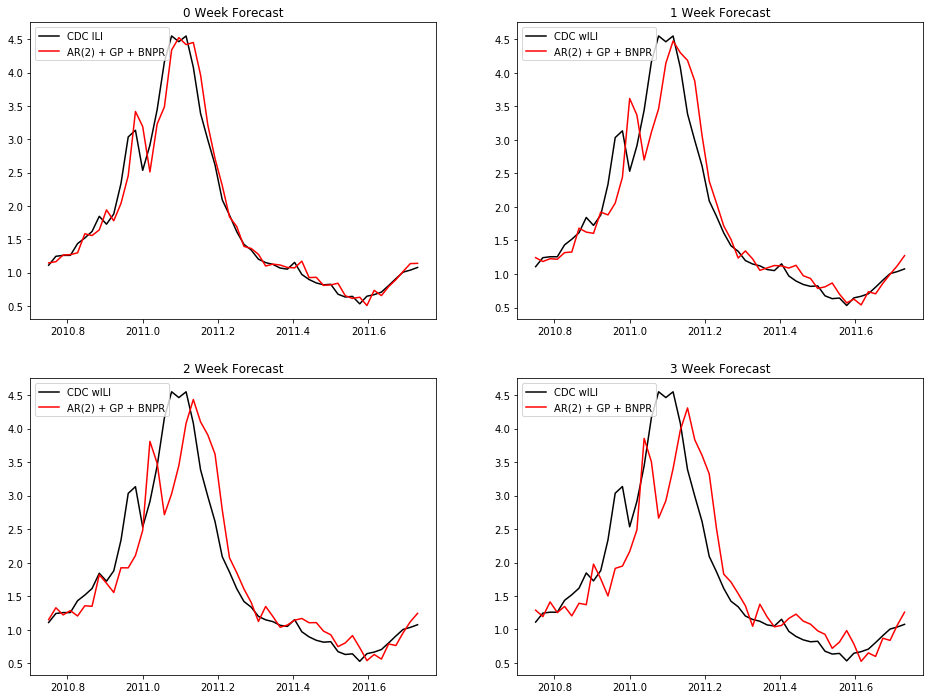

      Correlation       MAE       MSE      RMSE
0 wk     0.981255  0.143449  0.048768  0.220835
1 wk     0.937610  0.254764  0.158473  0.398087
2 wk     0.901262  0.315908  0.246095  0.496079
3 wk     0.861078  0.399544  0.338945  0.582190


In [45]:
plotGraphs("AR(2) + GP + BNPR", results_SAR)

This is regression using AR(3), the best ARIMA model fit 

In [46]:
y_train_curr = y_train.reshape(y_train.size)
y_train_curr = y_train_curr[0:-3]
y_test_curr = y_test.reshape(y_test.size)
y_test_curr = np.concatenate((y_train_curr[-3:], y_test_curr))
d_train = {'y':y_train_curr}
df_train = pd.DataFrame(data=d_train)
d_test = {'y': y_test_curr[0:4]}
df_test = pd.DataFrame.from_dict(data=d_test)
model = pf.ARIMAX(data=df_train, formula='y~1', ar=2, ma=0, family=pf.Normal())
model.fit(method="MLE")
forecast = model.predict(h = 4, oos_data = df_test, intervals=False)
results_AR = np.array(forecast).reshape(1,forecast.size)
for i in range(1, y_test.size) :
    y_train_curr = np.append(y_train_curr, y_test_curr[0])
    y_train_curr = y_train_curr[-200:]
    y_test_curr = y_test_curr[1:]
    d_train = {'y':y_train_curr}
    df_train = pd.DataFrame(data=d_train)
    d_test = {'y': y_test_curr[0:4]}
    df_test = pd.DataFrame.from_dict(data=d_test)
    model = pf.ARIMAX(data=df_train, formula='y~1', ar=2, ma=0, family=pf.Normal())
    model.fit(method="MLE")
    forecast = model.predict(h = 4, oos_data = df_test, intervals=False)
    results_AR = np.vstack((results_AR, np.array(forecast).reshape(1, forecast.size)))

y_train_curr = np.append(y_train_curr, y_test_curr[0])
y_train_curr = y_train_curr[-200:]
y_test_curr = y_test_curr[1:]
d_train = {'y':y_train_curr}
df_train = pd.DataFrame(data=d_train)
d_test = {'y': y_test_curr[0:3]}
df_test = pd.DataFrame.from_dict(data=d_test)
model = pf.ARIMAX(data=df_train, formula='y~1', ar=2, ma=0, family=pf.Normal())
model.fit(method="MLE")
forecast = model.predict(h = 3, oos_data = df_test, intervals=False)
results_AR = np.vstack((results_AR, np.append(np.array(forecast).reshape(1, forecast.size), 0)))

y_train_curr = np.append(y_train_curr, y_test_curr[0])
y_train_curr = y_train_curr[-200:]
y_test_curr = y_test_curr[1:]
d_train = {'y':y_train_curr}
df_train = pd.DataFrame(data=d_train)
d_test = {'y': y_test_curr[0:2]}
df_test = pd.DataFrame.from_dict(data=d_test)
model = pf.ARIMAX(data=df_train, formula='y~1', ar=2, ma=0, family=pf.Normal())
model.fit(method="MLE")
forecast = model.predict(h = 2, oos_data = df_test, intervals=False)
results_AR = np.vstack((results_AR, np.append(np.array(forecast).reshape(1, forecast.size), np.array([0,0]))))

y_train_curr = np.append(y_train_curr, y_test_curr[0])
y_train_curr = y_train_curr[-200:]
y_test_curr = y_test_curr[1:]
d_train = {'y':y_train_curr}
df_train = pd.DataFrame(data=d_train)
d_test = {'y': y_test_curr[0:1]}
df_test = pd.DataFrame.from_dict(data=d_test)
model = pf.ARIMAX(data=df_train, formula='y~1', ar=2, ma=0, family=pf.Normal())
model.fit(method="MLE")
forecast = model.predict(h = 1, oos_data = df_test, intervals=False)
results_AR = np.vstack((results_AR, np.append(np.array(forecast).reshape(1, forecast.size), np.array([0,0,0]))))

In [50]:
np.savetxt(fname = "/Users/RayneHernandez1/Desktop/NextFlu/results_ar.csv", X = results_AR, delimiter = ",")

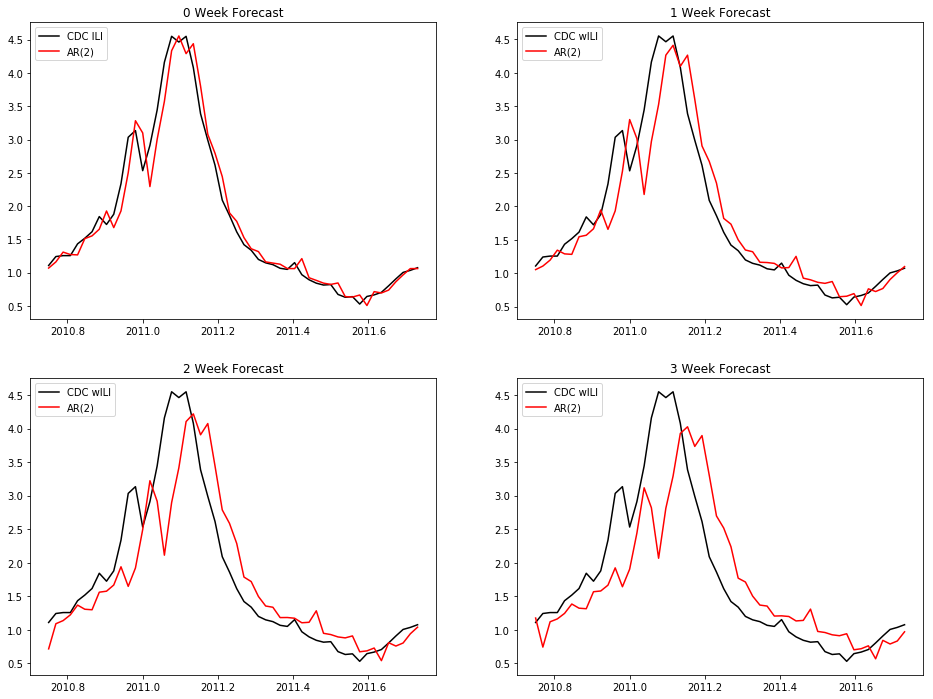

      Correlation       MAE       MSE      RMSE
0 wk     0.980153  0.153297  0.051333  0.226568
1 wk     0.928762  0.275247  0.179799  0.424027
2 wk     0.863848  0.386077  0.333770  0.577728
3 wk     0.789624  0.502630  0.496523  0.704644


In [48]:
plotGraphs("AR(2)", results_AR)